In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# some varibles
data_dir = "/content/drive/MyDrive/mordy/"
batch_size = 8
img_height = 128
img_width = 128

In [ ]:
# init dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=3412,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=1243,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# ['1', '2', '3', '4', '5']
class_names = train_ds.class_names

# 5
num_classes = len(class_names)

Found 296 files belonging to 5 classes.
Using 267 files for training.
Found 296 files belonging to 5 classes.
Using 29 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# to trzeba wymienić na cos innego bo bieda
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

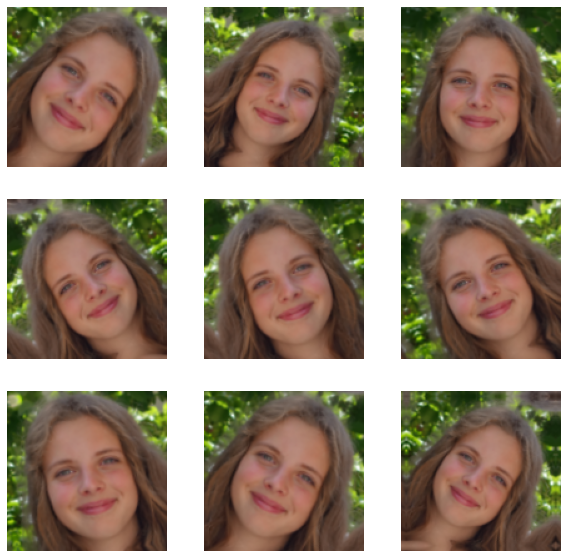

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
# for statistics
history = model.fit(train_ds, epochs=75, 
                    validation_data=val_ds,batch_size = batch_size)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

Epoch 1/75


34/34 [==============================] - 34s 669ms/step - loss: 1.6303 - accuracy: 0.2322 - val_loss: 1.5293 - val_accuracy: 0.3103
Epoch 2/75
34/34 [==============================] - 1s 34ms/step - loss: 1.5665 - accuracy: 0.2659 - val_loss: 1.5306 - val_accuracy: 0.2414
Epoch 3/75
34/34 [==============================] - 1s 34ms/step - loss: 1.5528 - accuracy: 0.2921 - val_loss: 1.5278 - val_accuracy: 0.3448
Epoch 4/75
34/34 [==============================] - 1s 35ms/step - loss: 1.5387 - accuracy: 0.3258 - val_loss: 1.4596 - val_accuracy: 0.3103
Epoch 5/75
34/34 [==============================] - 1s 35ms/step - loss: 1.5173 - accuracy: 0.3146 - val_loss: 1.4396 - val_accuracy: 0.4828
Epoch 6/75
34/34 [==============================] - 1s 35ms/step - loss: 1.5089 - accuracy: 0.3483 - val_loss: 1.4614 - val_accuracy: 0.3448
Epoch 7/75
34/34 [==============================] - 1s 34ms/step - loss: 1.4609 - accuracy: 0.3483 - val_loss: 1.4331 - val_accuracy: 0.4138
Epoch 8/75
34/34 [====

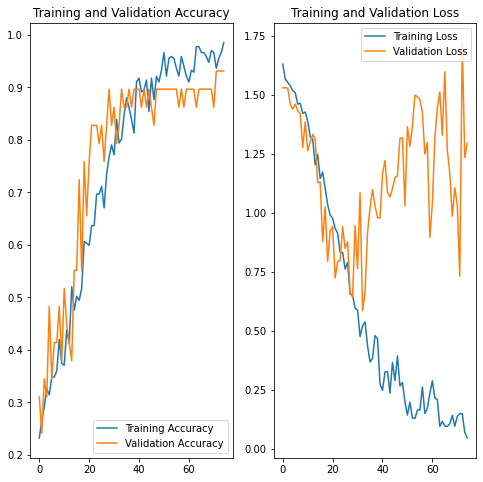

In [ ]:
epochs_range = range(75)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('dzban.png')

# Save model 
model.save('/content/drive/MyDrive/models/test1')

1/1 [==============================] - 0s 22ms/step


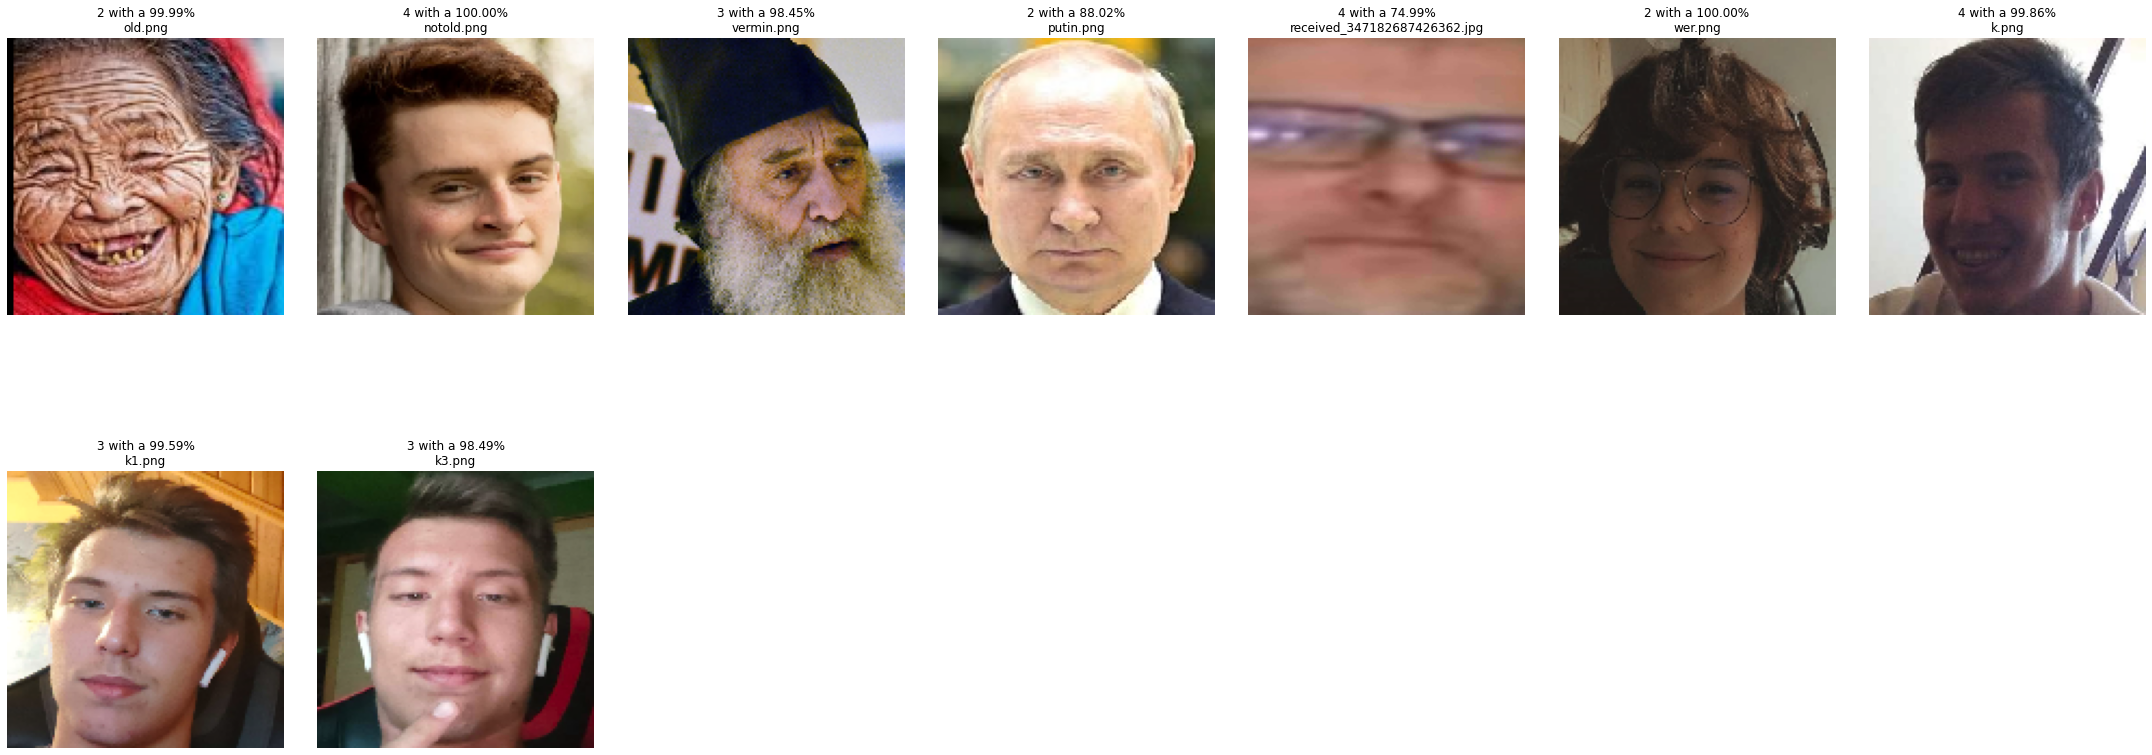

In [ ]:
import os
model = keras.models.load_model('/content/drive/MyDrive/models/test1')
plt.figure(figsize=(30, 30))

images = np.array(os.listdir("/content/drive/MyDrive/mordy-validate/"))
i = -1
for image in images:
  i = i + 1
  img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/mordy-validate/" + image, target_size=(128, 128)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  ax = plt.subplot(5, 7, i + 1)
  plt.tight_layout()
  plt.imshow(img)
  plt.title( "{} with a {:.2f}%".format(class_names[np.argmax(score)], 100 * np.max(score)) + "\n" +str(image) )
  plt.axis("off")
plt.savefig('/content/drive/MyDrive/mordy-results.png',facecolor="white")

1/1 [==============================] - 0s 20ms/step


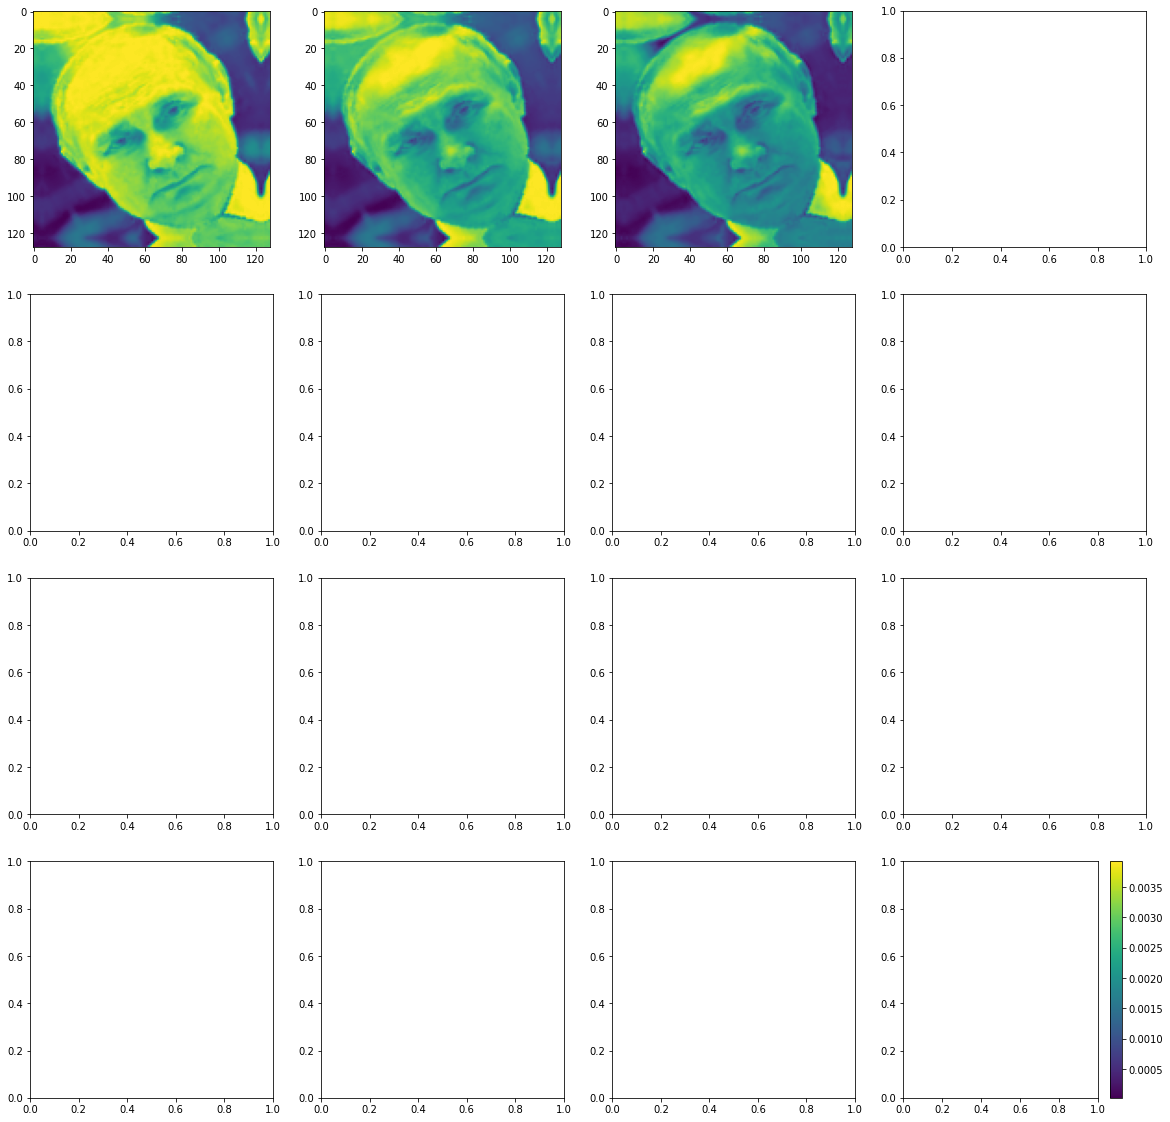

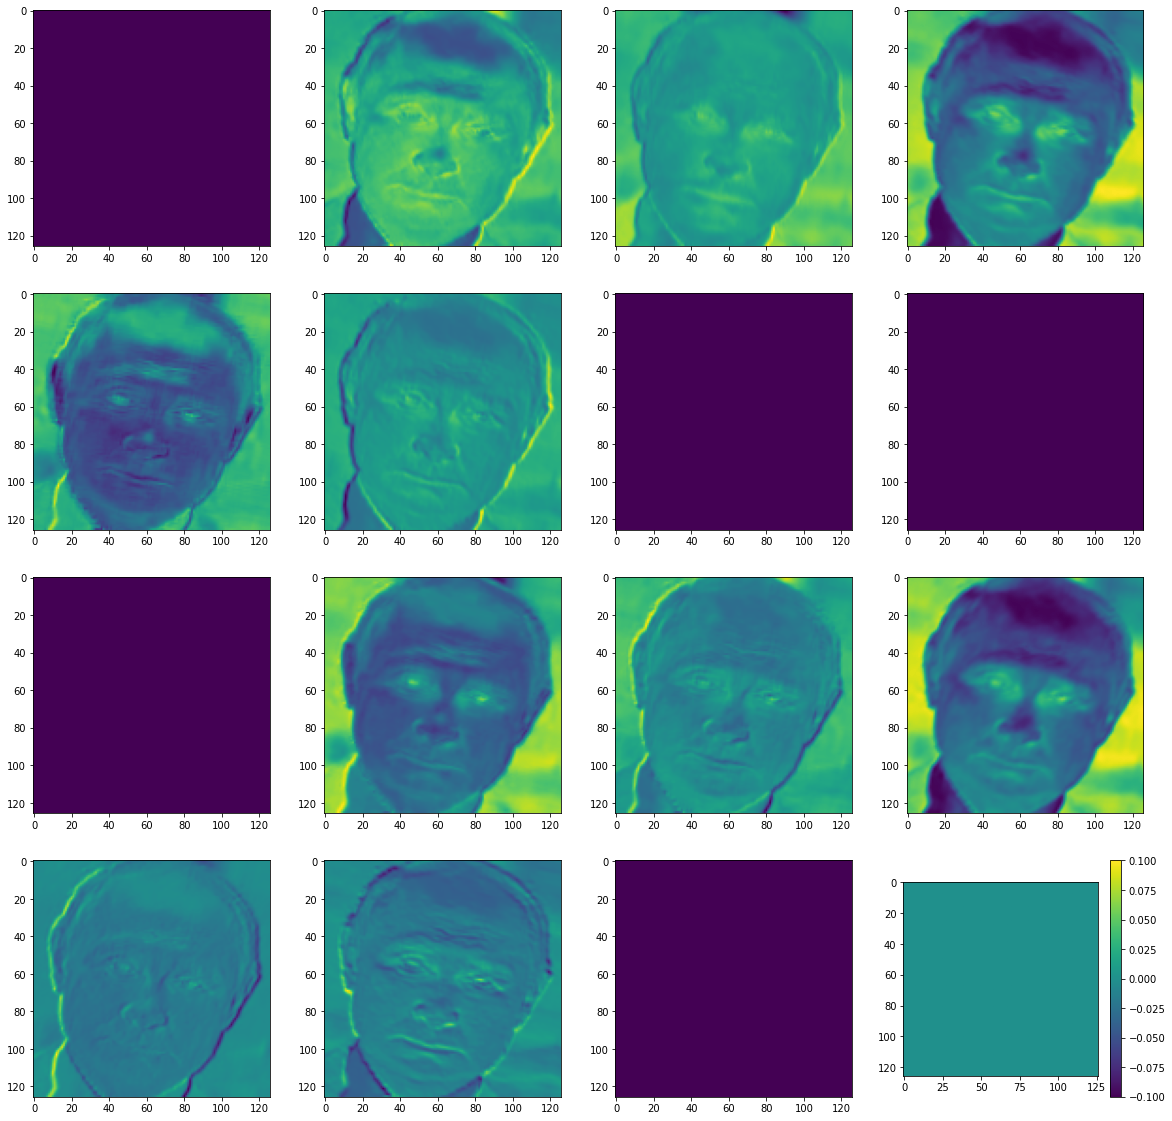

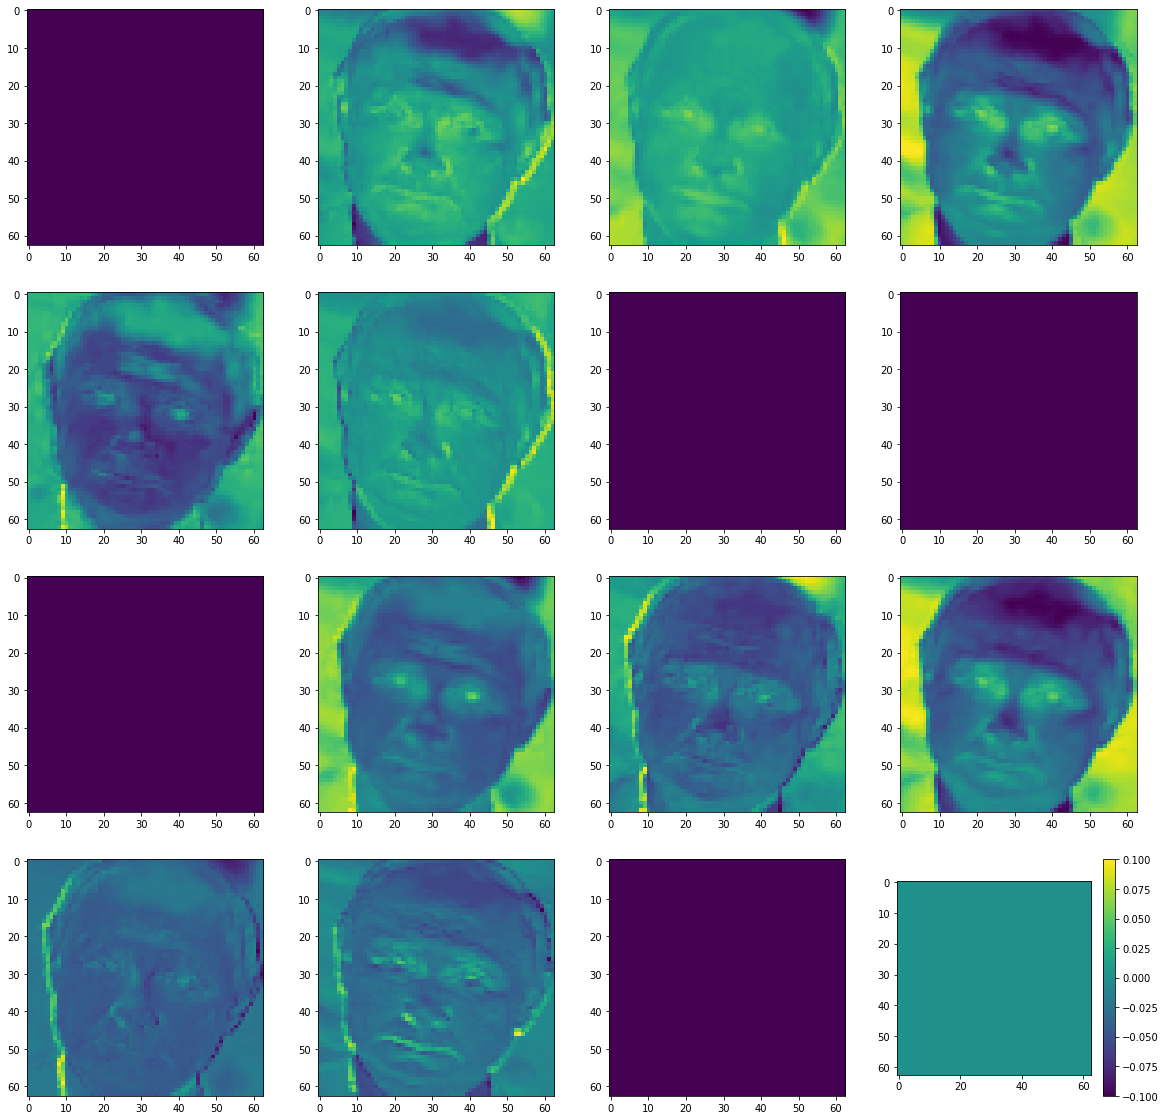

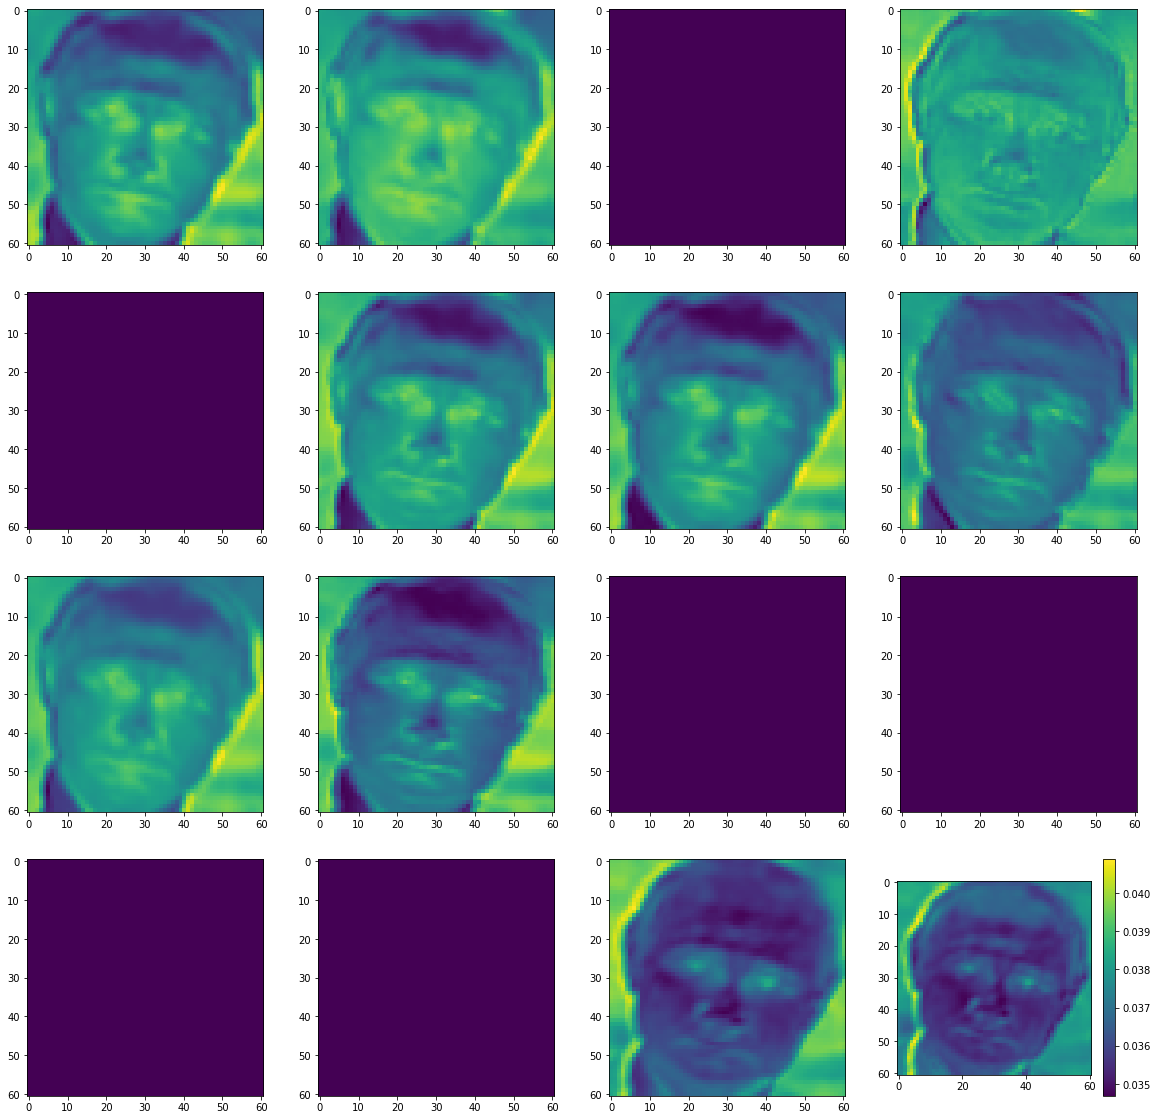

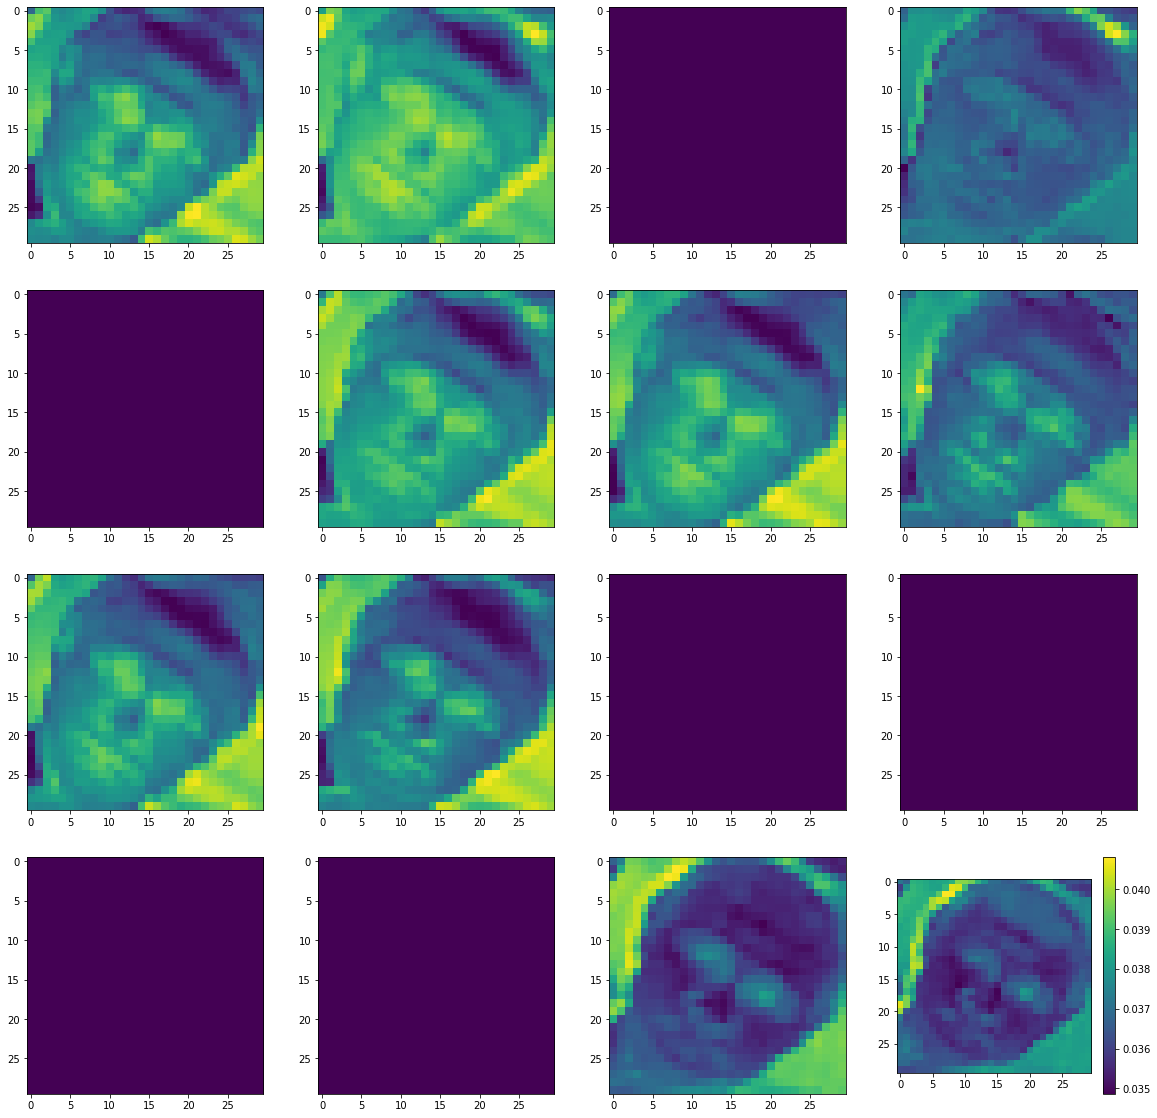

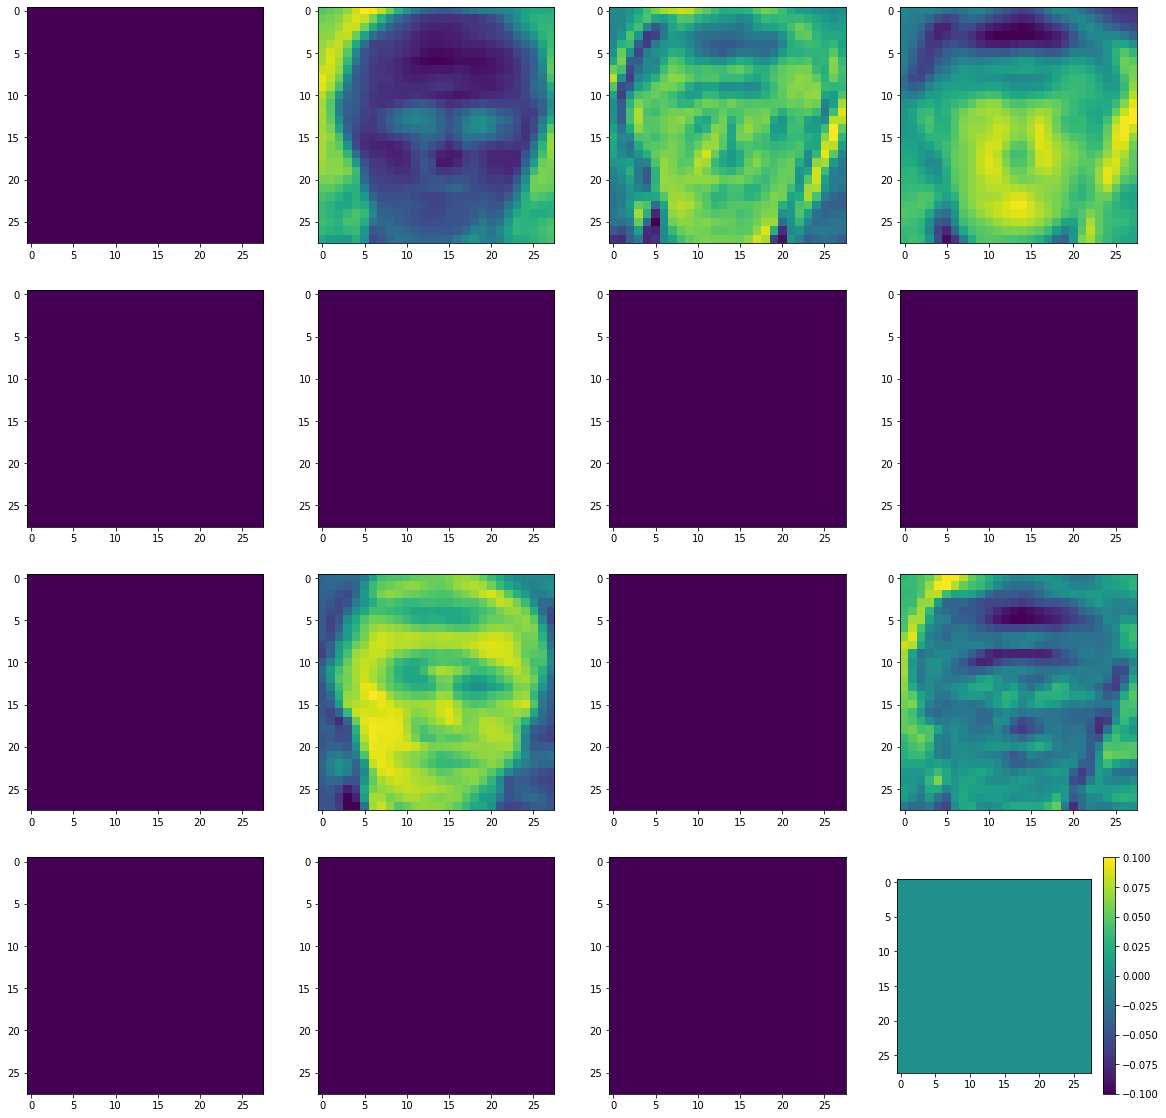

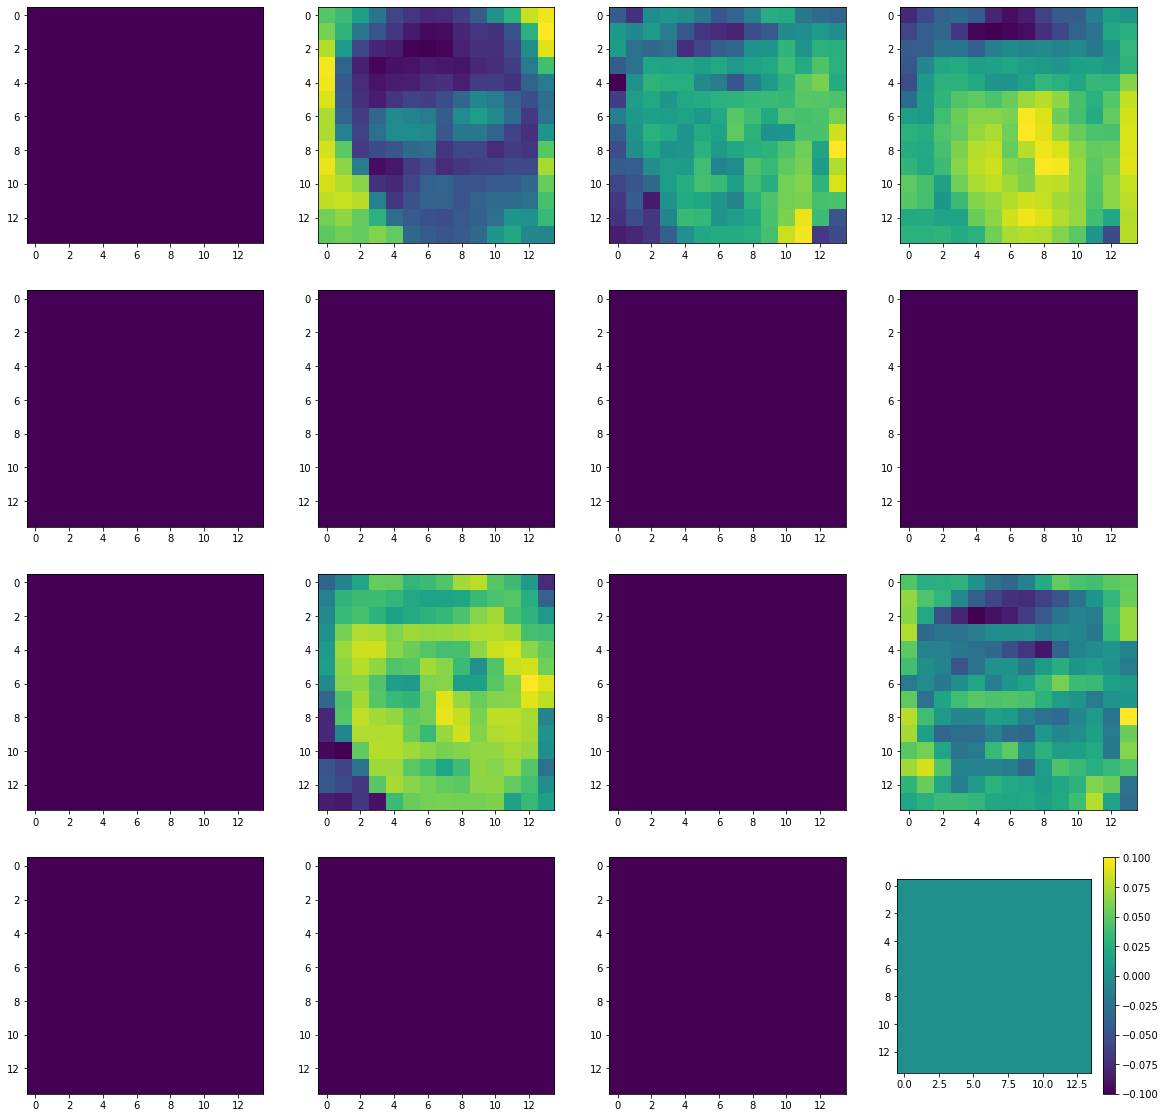

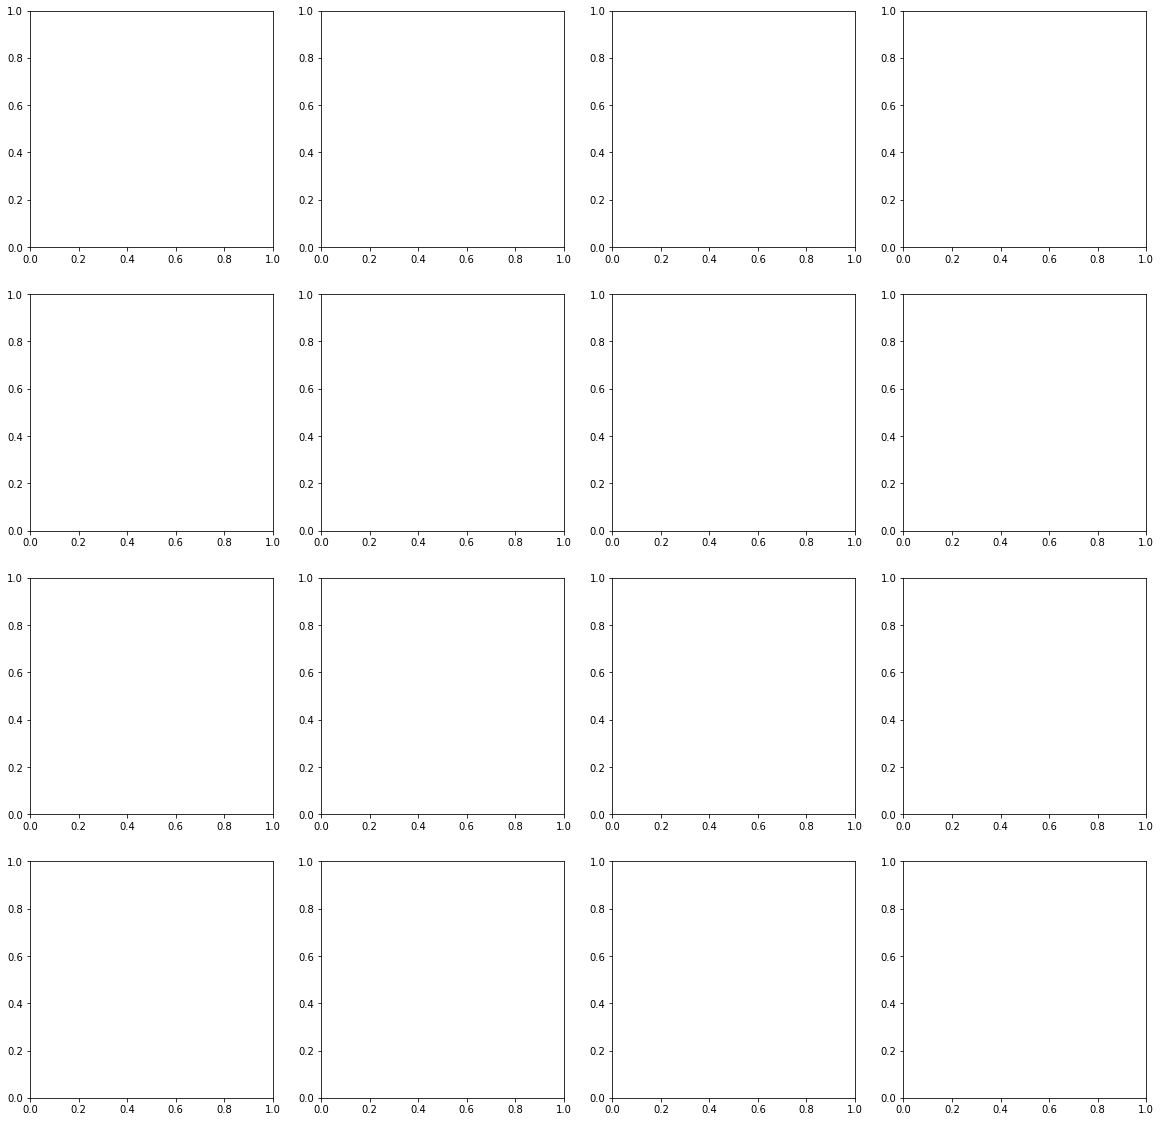

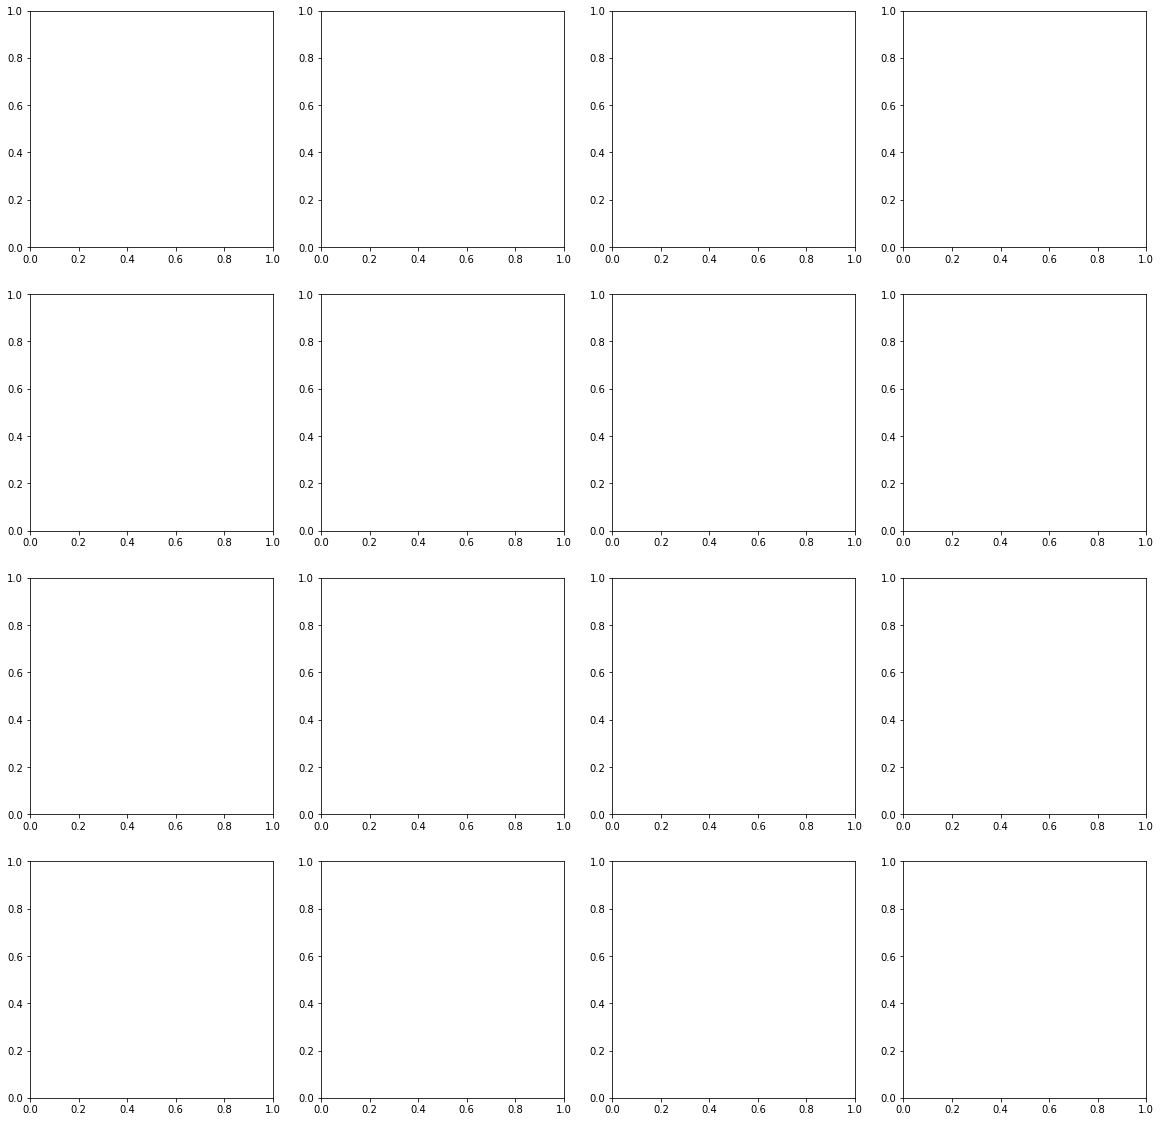

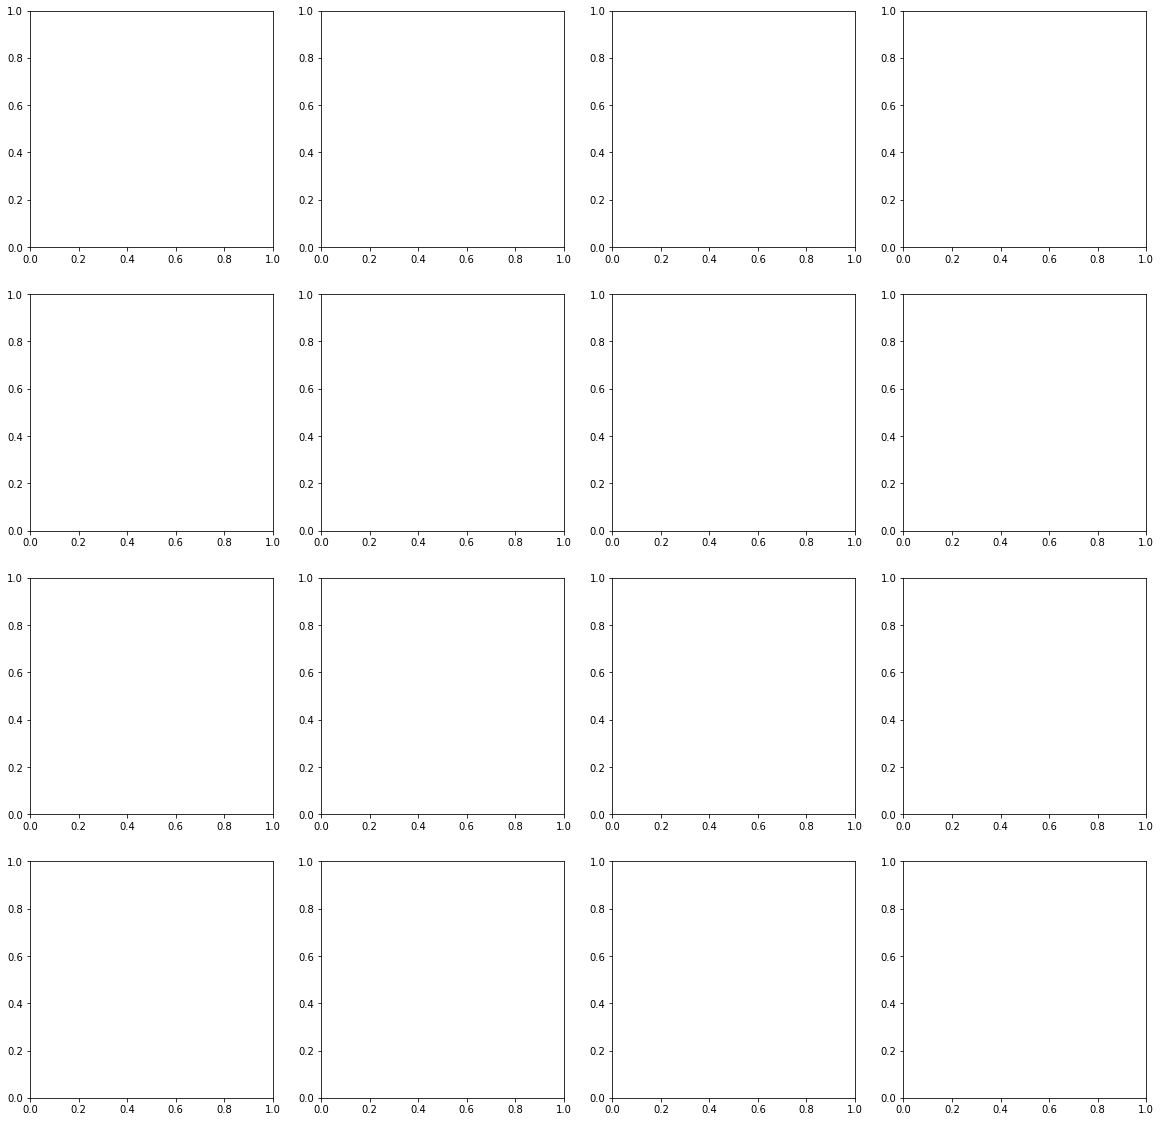

In [ ]:
from tensorflow.keras.models import Model
img = keras.preprocessing.image.load_img(
  "/content/drive/MyDrive/mordy-validate/putin.png", target_size=(128, 128)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
feature_maps = model.predict(img_array)
# plot all 64 maps in an 8x8 squares
x = 0
for irr in range(len(model.layers) - 1):
  x = x + 1
  activation_model =  Model(inputs=model.inputs, outputs=model.layers[x].output)

  img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/mordy-validate/putin.png", target_size=(128, 128)
  )
  img_tensor = keras.preprocessing.image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.

  activation = activation_model(img_tensor)

  plt.figure(figsize=(20,20))
  for i in range(16):
      plt.subplot(4,4,i+1)
      try:
        plt.imshow(activation[0,:,:,i])
      except:
        ...
  try:
    _ = plt.colorbar()
  except:
    ...
plt.show()